
# Objetivo

La meta es que junto con el departamento de marketing se debe analizar una lista de hipótesis que pueden ayudar a aumentar los ingresos de una tienda en linea.

Parte 1: Priorización de hipótesis

 - Carga de archivo e inspección inicial de información

 - Preprocesamientos de datos

 - Análisis de los datos

 - Conclusiones generales

Parte 2: Análisis de test A/B

 - Análisis de los datos

 - Conclusiones generales

# Preprocesamiento de datos

In [1]:
#importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from scipy import stats as st
import math as mth
import datetime as dt

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv',sep=';')
visits = pd.read_csv('/datasets/visits_us.csv')
orders =  pd.read_csv('/datasets/orders_us.csv', sep=',')

In [3]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypotheses = hypotheses.rename(columns=str.lower)

In [5]:
pd.set_option('max_colwidth', 100)
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average...,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products ...,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [7]:
visits['date'] =  pd.to_datetime(visits['date'])
visits.head(5)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [9]:
orders['date'] =  pd.to_datetime(orders['date'])

In [10]:
orders.columns = orders.columns.str.lower()
orders.info()
orders.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B


Hasta el momento se revisaron columnas, se modificaron nombres de columnas a minusculas, asi como el data type de la columna date a datetime. Veamos rapidamente si hay duplicados:

In [11]:
display(hypotheses.duplicated().sum(), orders.duplicated().sum(), visits.duplicated().sum())

0

0

0

No hay lineas duplicadas en los dataFrames.

## Explorando visits 

In [12]:
visits_a = visits.query('group == "A"').visits.sum()
visits_b = visits.query('group == "B"').visits.sum()
print('Numero de visitas en grupo A =', visits_a)
print('Numero de visitas en grupo B =', visits_b)

Numero de visitas en grupo A = 18736
Numero de visitas en grupo B = 18916


No hay tanta disparidad en los datos respecto el numero de visitas por grupo.

In [13]:
# min and max tiempo de visita
print('Primera visita - ', visits.date.min())
print('Ultima visita  - ', visits.date.max())

Primera visita -  2019-08-01 00:00:00
Ultima visita  -  2019-08-31 00:00:00


## Orders

Revisemos el numero de ordenes y clientes

In [14]:
number_of_orders = orders.transactionid.count()
number_of_buyers = orders.visitorid.nunique()
print('Numbero de ordenes = ', number_of_orders)
print('Numero de compradores = ', number_of_buyers)

Numbero de ordenes =  1197
Numero de compradores =  1031


In [15]:
# min and max tiempo de visita
print('Primera visita - ', orders.date.min())
print('Ultima visita  - ', orders.date.max())

Primera visita -  2019-08-01 00:00:00
Ultima visita  -  2019-08-31 00:00:00


In [16]:
orders.group.value_counts()

B    640
A    557
Name: group, dtype: int64

El grupo B tiene alrededor de 15% mas ordenes

In [17]:
A_visitors = orders.query('group == "A"').visitorid.unique()
B_visitors = orders.query('group == "B"').visitorid.unique()

same_buyers = orders.query('visitorid in @A_visitors and visitorid in @B_visitors')
same_buyers['visitorid'].nunique()

58

Hay 58 compradores identicos en ambos grupos. Vamos a eliminarlos para evitar errores o conteos dobles al momento de usar los datos para analisis.

In [18]:
orders = orders.drop(same_buyers.index, axis=0)

In [19]:
#verificamos de nuevo:
A_visitors = orders.query('group == "A"').visitorid.unique()
B_visitors = orders.query('group == "B"').visitorid.unique()

same_buyers = orders.query('visitorid in @A_visitors and visitorid in @B_visitors')
same_buyers['visitorid'].nunique()

0

## Parte 1. Priorizar hipótesis

### ICE 

                                                                                            hypothesis  \
8                                     Launch a promotion that gives users discounts on their birthdays   
0                          Add two new channels for attracting traffic. This will bring 30% more users   
7             Add a subscription form to all the main pages. This will help you compile a mailing list   
6              Show banners with current offers and sales on the main page. This will boost conversion   
2  Add product recommendation blocks to the store's site. This will increase conversion and average...   
1                                    Launch your own delivery service. This will shorten delivery time   
5                                  Add a customer review page. This will increase the number of orders   
3  Change the category structure. This will increase conversion since users will find the products ...   
4                     Change the background co

<Figure size 1008x576 with 0 Axes>

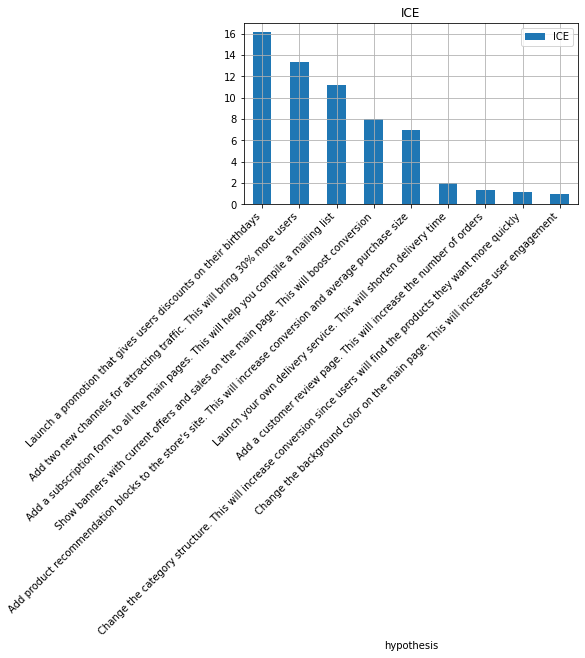

In [54]:
hypotheses['ICE'] = hypotheses['impact']*hypotheses['confidence']/hypotheses['effort']
ICE=hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
print(ICE)

plt.figure(figsize=(14, 8))  
bar_plot = ICE.plot(x='hypothesis', y='ICE', kind='bar', grid=True, title='ICE')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
 

plt.subplots_adjust(bottom=0.25) 
plt.show()

Las hipótesis mas prometedoras de acuerdo a ICE son:

8-Lanzar una promocion que de a los usuarios descuentos en sus cumpleanos.

0-Agregar dos nuevos canales para atraer tráfico. Esto traerá un 30% más de usuarios.

7-Agregar un formulario de suscripción a todas las páginas principales. Esto le ayudará a compilar una lista de correo.

### RICE

<Figure size 1008x576 with 0 Axes>

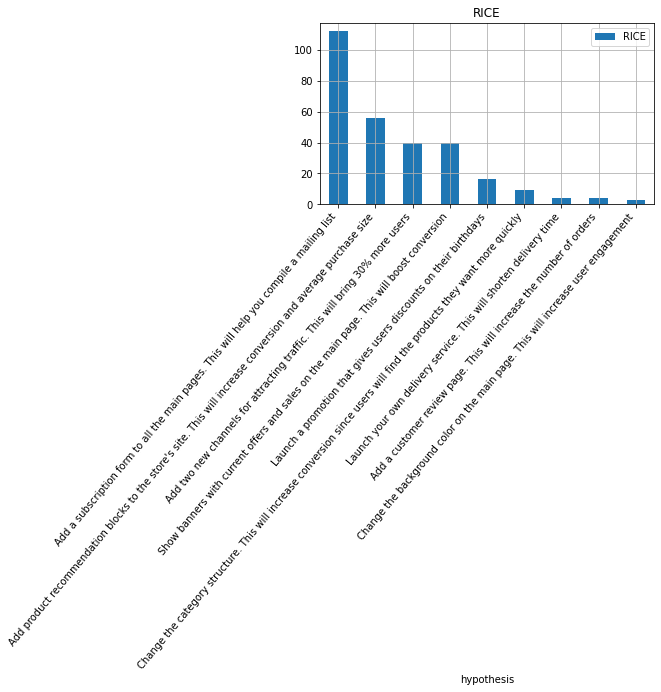

In [51]:
hypotheses['RICE'] = hypotheses['impact'] * hypotheses['confidence'] * hypotheses['reach'] / hypotheses['effort']
RICE = hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

plt.figure(figsize=(14, 8))  
bar_plot = RICE.plot(x='hypothesis', y='RICE', kind='bar', grid=True, title='RICE')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=50, horizontalalignment='right')


plt.subplots_adjust(bottom=0.25) 
plt.show()

En cuanto a RICE, las siguientes hipotesis presentan mas potencial:

7  Agregar un a forma de subscripcion a las paginas principales para compilar una mailing list.

2  Agregar recomendacion de prodoctuos a sitio. Esto incrementara la tasa de conversion y el tamaño promedio de compra.

0  Agregar dos nuevos canales para atraer trafico. Esto traera 30% mas de usuarios.                        

###  Priorización de hipótesis cuando se utiliza RICE en lugar de ICE

Cuanto mayor sea la puntuación del parámetro "reach", mayor será la diferencia entre las dos puntuaciones "RICE" e "ICE".

Hipótesis 7('Añadir un formulario de suscripción a todas las páginas principales. Esto le ayudará a crear una lista de correo') y 0('Añadir dos nuevos canales para atraer tráfico. Esto atraerá un 30% más de usuarios').

La hipótesis 7 tiene: el alcance más alto, lo que significa que muchos usuarios se verán afectados por la actualización, el alto impacto significa que los cambios afectarán fuertemente a los usuarios, la puntuación de esfuerzo (costo) media y la confianza fuerte.

La hipótesis 0 tiene: menor alcance, mayores efectos y costos.

Podemos elegir una de estas hipótesis en función de nuestros objetivos y presupuesto.

# Parte 2. Test A/B 

##  Ingreso acumulado por grupo

In [22]:

datesGroups = orders[['date','group']].drop_duplicates() 
# obtenemos datos acumulados diarios de orders
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                     .agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1
...,...,...,...,...,...
533,2019-08-29,B,510,490,74576.7
757,2019-08-30,A,460,437,52363.7
690,2019-08-30,B,531,511,77863.5
958,2019-08-31,A,468,445,53212.0


Ahora obtenemos datos diarios cumulativos agregados sobre los visitantes

In [23]:
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [24]:
# unimos las dos tablas y renombramos columnas

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


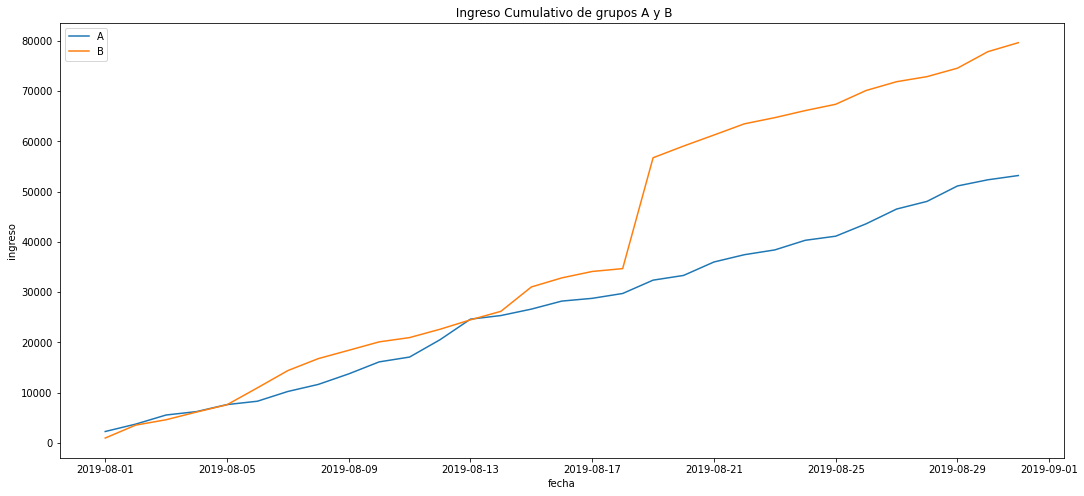

In [25]:
#Grafico para ver le ingreso cumulativo diario de los grupos A/B
# Datafrafme con ordenes e ingreso cumulativo diario de grupo A 
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# Datafrafme con ordenes e ingreso cumulativo diario de grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# grafico de grupo A
plt.figure(figsize=(18,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# grafico de grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title(' Ingreso Cumulativo de grupos A y B')
plt.xlabel('fecha')
plt.ylabel('ingreso')

plt.show()

Los ingresos aumentan constantemente durante la prueba lo cual es bueno. A partir del dia 5 hay un brinco en el grupo B y los ingresos van por arriba del grupo A. Tambien vemos que el grupo B presenta ciertos cambios abruptos durante la prueba.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo. El gráfico es correcto.
</div>

## Tamaño de pedido promedio acumulado por grupo

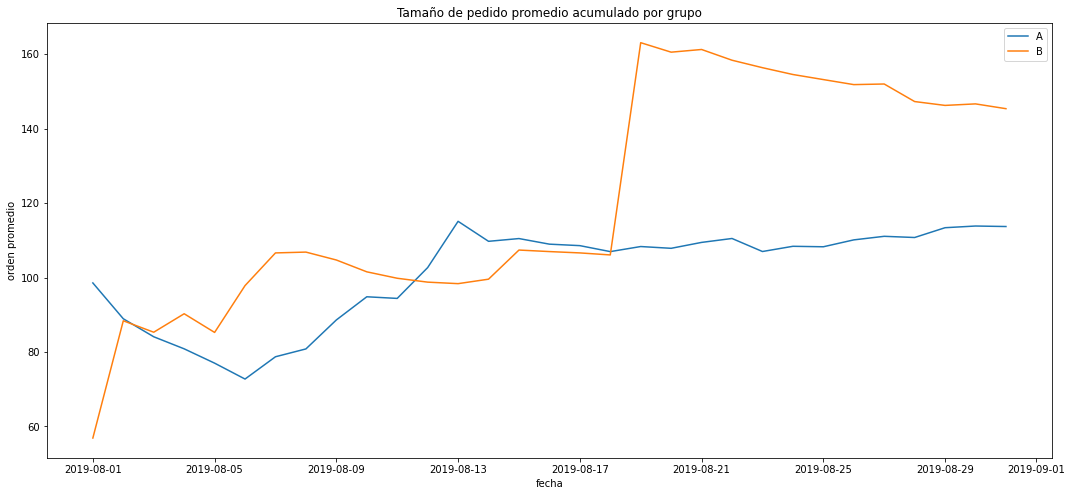

In [26]:
#Graficamos el tamaño promedio de compra por grupo. Dividimos los ingresos acumulados por el número acumulado de pedidos:
plt.figure(figsize=(18,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('Tamaño de pedido promedio acumulado por grupo')
plt.xlabel('fecha')
plt.ylabel('orden promedio')

plt.show()

En general, a excepción de un pico entre los dias 12 al 18 aproximadamente, el grupo B tiene pedidos promedios mas altos que el grupo A. Ambos grupos presentran ciertos picos de subidas y bajadas, pero no necesariamente son similares en la linea de tiempo. Para el grupo B se produjo un fuerte salto en el nivel del tamaño promedio de las compras, que duró varios días y luego comenzó a disminuir gradualmente. Actualmente hay anomalías en esta área.

## Diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A

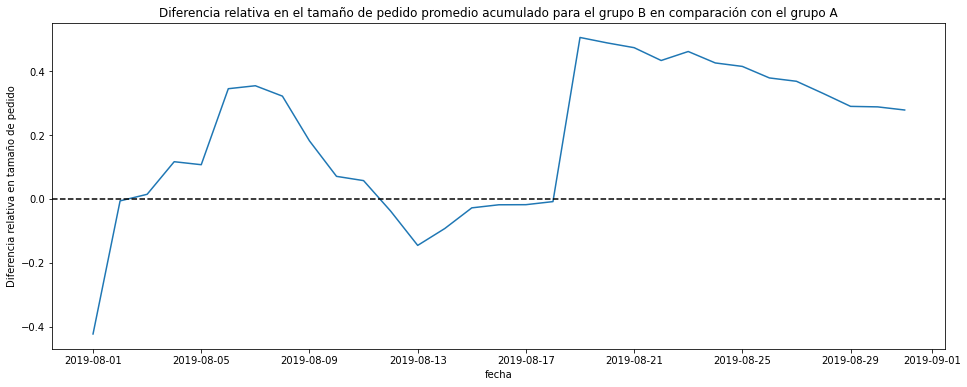

In [27]:

# obtemos datos en mergedCumulateRevenue
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# graficamos la diferencia relativa en el tamaño de pedido promedio entre A y B
plt.figure(figsize=(16,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('Diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A')

plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('fecha')
plt.ylabel('Diferencia relativa en tamaño de pedido')

plt.show()

La diferencia entre los segmentos aumenta en varioa puntos. Esto significa que debe haber algunos pedidos grandes y valores atípicos. Los valores siguen decreciendo hacia al final del mes.

## Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día

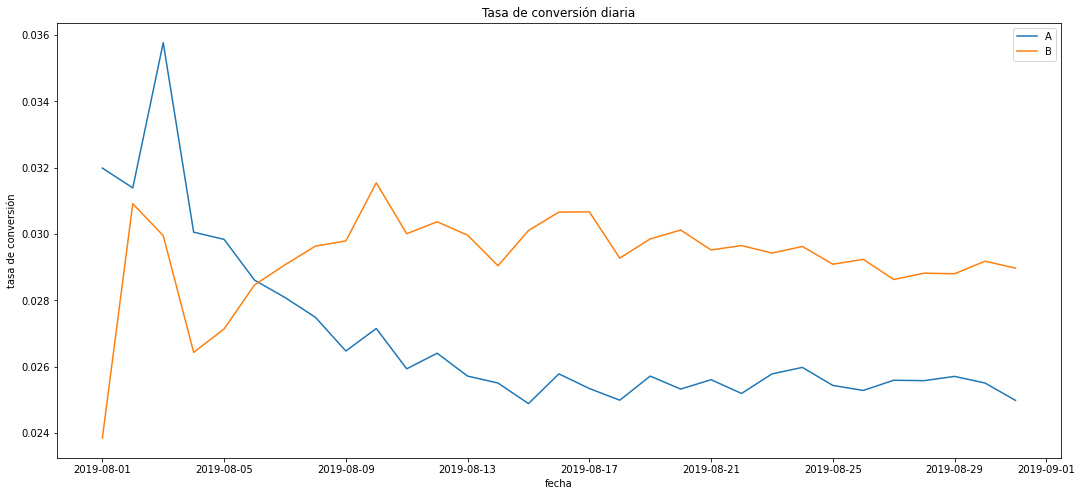

In [28]:
# calculando la tasa de conversion cumulativa
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# filtrando grupo A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# filtrando grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# graficamos
plt.figure(figsize=(18,8))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.legend()
plt.title('Tasa de conversión diaria')
plt.xlabel('fecha')
plt.ylabel('tasa de conversión')

plt.show()

A pesar de que la tasa de conversion mas falta se presento en el grupo A, despues vino un declive gradual. El grupo B presenta un patron similar pero la tasa de conversion se mantuvo por arriba del grupo B el resto del mes.


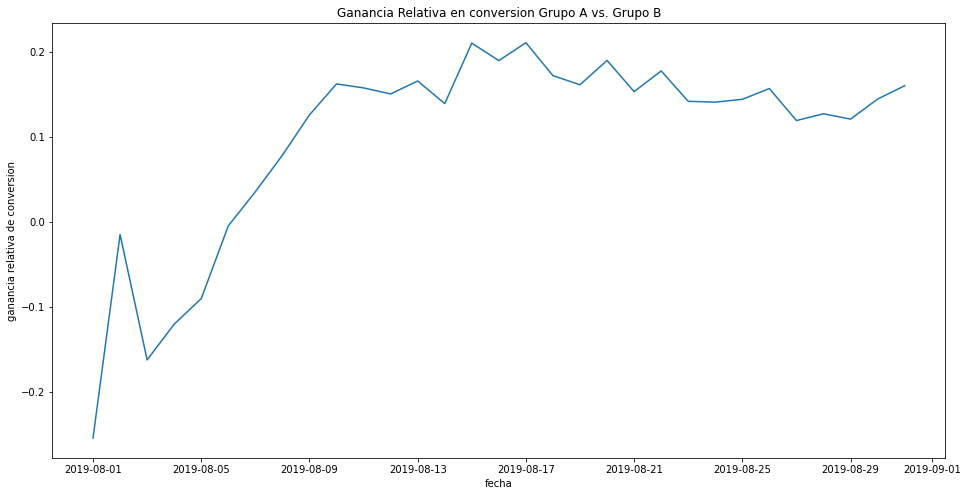

In [29]:
# gráfico de diferencia relativa para las tasas de conversión acumuladas
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16,8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative gain in conversion in group B as opposed to group A")
plt.title('Ganancia Relativa en conversion Grupo A vs. Grupo B')
plt.xlabel('fecha')
plt.ylabel('ganancia relativa de conversion')


plt.show()

Vemos que al principio ambas tasas de conversion crecen pero grupo B lidera la metrica. La conversión del grupo B crece mucho más rápido que la conversión del grupo A. La conversión del grupo A se reduce significativamente en comparación con la conversión del grupo B. En cualquier caso, al inicio de la prueba vemos fuertes saltos y esto puede deberse a anomalías.

Después del día 10, vemos la estabilización de los ratios de conversión de ambos grupos.

## Gráfico de dispersión del número de pedidos por usuario

,visitorid,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
...,...,...
331,1438226485,1
332,1452540367,1
333,1455323168,1
334,1455861274,1


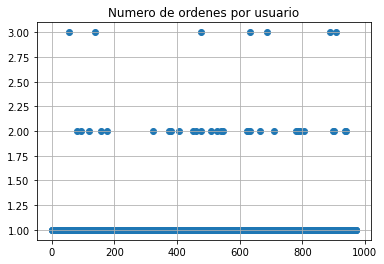

In [30]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorid', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False))

# the range of numbers from 0 to the number of observations in ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Numero de ordenes por usuario')

plt.grid()

plt.show()


La mayoria de los usuarios realizan un pedido. Con menos frequencia, pero si hay usarios que realizan dos pedidos. Mas de dos ordenes podrian ser .
anomalias

### Percentiles 95 y 99 para el número de pedidos por usuario

In [31]:
print('Los percentiles 95 y 99 para el número de pedidos por usuario:', np.percentile(ordersByUsers['orders'], [95, 99]))

Los percentiles 95 y 99 para el número de pedidos por usuario: [1. 2.]


### Gráfico de dispersión de los precios de los pedidos

      transactionid   visitorid       date  revenue group
425       590470918  1920142716 2019-08-19  19920.4     B
1196     3936777065  2108080724 2019-08-15   3120.1     B
1136      666610489  1307669133 2019-08-13   1425.8     A
744      3668308183   888512513 2019-08-27   1335.6     B
743      3603576309  4133034833 2019-08-09   1050.0     A
1103     1348774318  1164614297 2019-08-12   1025.8     A
1099      316924019   148427295 2019-08-12   1015.9     A
949      1347999392   887908475 2019-08-21    930.0     A
940      2420050534  4003628586 2019-08-08    905.8     B
613      4071177889  3931967268 2019-08-07    830.3     B


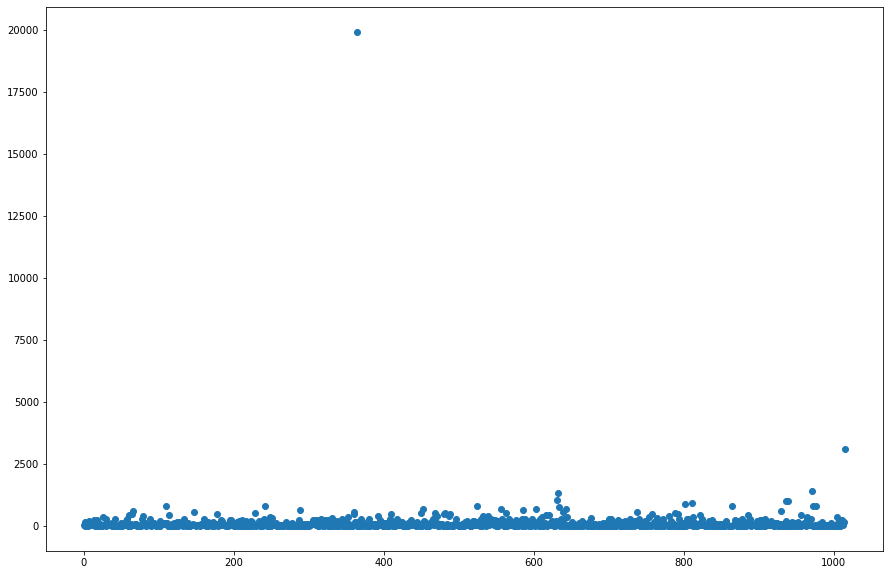

In [32]:
#sorteamos por revenue
print(orders.sort_values(by='revenue',ascending=False).head(10))

data = orders.sort_values(by='revenue',ascending=False)

#grafico de dispersion 


x_values_revenue = pd.Series(range(0, len(orders['revenue'])))
plt_1 = plt.figure(figsize=(15, 10))
plt.scatter(x_values_revenue, orders['revenue']) 

Hay una distancia considerable entre las anomalias y los valores promedio, lo cual puede tener un impacto y alterar valores en analisis de acumulados. El ingreso promedio por transaccion parece estar por abajo de los $1000, con las excepciones de los outliers que estan por arriba de 2000.

### Percentiles 95 y 99 de los precios de los pedidos

In [33]:
print('Los Percentiles 95 y 99 de los precios de los pedidos:', np.percentile(orders['revenue'], [95, 99])) 

Los Percentiles 95 y 99 de los precios de los pedidos: [414.275 830.3  ]


No mas del 5% de los usuarios hicieron una orden que costara mas de $414.27 y no mas del 1% costaron mas de 830.3. Cualquier costo mas alto que eso se considera una anomalia.

## Significancia estadística de la diferencia en la conversión entre los grupos

Para calcular la significancia  estadística de la diferencia de conversión entre los grupos se aplicara la prueba de Mann-Whitney.

La hipótesis nula, Ho: la tasa de conversión del grupo A es la misma que la tasa de conversión del grupo B.

Hipótesis H1: existe una diferencia estadísticamente significativa en la tasa de conversión entre los grupos A y B.

In [34]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders'] 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits [visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits [visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

print('p-value para comparar la conversion de los grupos:',"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Diferencia relativa en conversion entre los grupos:',"{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

p-value para comparar la conversion de los grupos: 0.01102
Diferencia relativa en conversion entre los grupos: 0.160


El p-value es mucho menor que 0.05 entonces se tienen que rechazar la hipótesis nula. El análisis de los datos brutos mostró que las tasas de conversión de los grupos tienen diferencias estadísticamente significativas.

La ganancia de conversión relativa para el grupo B en comparación con el grupo A es del 16%.

### Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos

La hipótesis nula, Ho: el tamaño promedio de los pedidos no difiere entre los grupos A y B.

Hipótesis H1: Existe una diferencia estadísticamente significativa en el tamaño promedio de los pedidos entre los grupos A y B.

In [35]:
print('p-value para comparar el tamaño promedio de los pedidos de los grupos:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Ganancia relativa del grupo B:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value para comparar el tamaño promedio de los pedidos de los grupos: 0.862
Ganancia relativa del grupo B: 0.278


El p-value es significativamente mayor que 0.05, por lo cual no hay razon para rechazar la hipótesis nula y y no podemos concluir que el tamaño promedio de los pedidos difiera entre los grupos.

###  Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados

Filtraremos los datos para eliminar valores atipicos. Se tomaran mas de 2 ordenes como anomalia y $830.3 como importe respectivamente.

In [36]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorid'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorid']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 830.3]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitorid, dtype: int64
(16,)


Hay 16 usuarios con valores atipicos que seran removidos del análisis.

In [37]:

#Grupos filtrados

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

# Datos filtrados, conversión: significancia estadística
print('Conversión')
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

print()

# Datos filtrados, conversión: significancia estadística
print('Pedido medio')
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

Conversión
0.007
0.189

Pedido medio
0.822
-0.032


Si hay una diferencia en las metricas comparado con los datos en bruto, aunque no afecta considerablemente la lectura final de los datos. La significancia respecto a la conversión aumento,mostrando la diferencia entre las poblaciones y con una diferencia de 18.9% del grupo B respecto al A. Mientras que en el pedido medio no hay razones para rechazar la hipótesis nula, con una reducción del 3.2% del pedido medio. 

# **Conclusiones generales**

Tras haber realizado el análisis de la prueba A/B, pudimos observar que habia "ruido" en los datos originales, lo cual era evidente al realizar las gráficas de los valores acumulados, ya que estas presentaban picos abruptos. Tras filtrar los datos pudimos determinar que la prueba A/B marca a B como el grupo lider, que aunque no demostró una gran diferencia respecto a la cantidad de pedido medio, sí mostro un incremento significativo del 18.9% en la tasa de conversión. Por esta razón, la recomendación es, aplicar de manera general los cambios probados en B.

En cuanto al aumento del pedido medio, al no existir resultados estadísticamente significativos, se recomienda continuar con el periodo de la prueba A/B en espera de la evolución de los resultados hacía valores más significativos. En caso de detener la prueba podría tratarse con otras hipótesis.